In [1]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
os.chdir('/content/drive/MyDrive/surya/AML_Assignment/Major_Project')
os.chdir('/content/drive/MyDrive/surya/AML_Assignment/Major_Project/MetaOptNet')

Mounted at /content/drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!git clone https://github.com/kjunelee/MetaOptNet.git

Cloning into 'MetaOptNet'...
remote: Enumerating objects: 248, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 248 (delta 2), reused 1 (delta 0), pack-reused 241
Receiving objects: 100% (248/248), 2.87 MiB | 10.23 MiB/s, done.
Resolving deltas: 100% (137/137), done.


In [ ]:
!pip install -r '/content/drive/MyDrive/surya/AML_Assignment/Major_Project/MetaOptNet/requirements.txt'

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 31.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for qpth: filename=qpth-0.0.16-py3-none-any.whl size=19522 sha256=91b3a3e76e3397eb6873c1f6f0c78cfd9c5033bed368416addf278efca788340
  Stored in directory: /root/.cache/pip/wheels/9e/f2/44/9121d0b84e8b35b1de55a8744c6452201ed697a5f89dae4f1d
  Created wheel for torchnet: filename=torchnet-0.0.4-py3-none-any.whl size=29728 sha256=8798827125c1eea9bff5a107767ad626b6a5cdc3a5213c49e64c2da12d2dde02
  Stored in directory: /root/.cache/pip/wheels/f7/ae/94/9f5edd6871983f30967ad11d60ef434c3d1b007654de4c8065
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408194 sha256=4b9f24cb4d9923add4500bb5e599b36589b0fe8ec8e9915548f43f4ee4c07b6d
  Stored in directory: /root/.cache/pip/wheels/42/29/49/5bed207bac4578e4d2c0c5fc0226bfd33a7e2953ea56356855
Successfully built qpth 

In [ ]:
!python train.py --gpu 0 --save-path "./experiments/FC100_MetaOptNet_SVM" --train-shot 15 \
--head Ridge --network ResNet --dataset FC100 --num-epoch 10 --save-epoch 5 --val-episode 100

Loading FC100 dataset - phase train
Loading FC100 dataset - phase val
using gpu: 0
{'num_epoch': 10, 'save_epoch': 5, 'train_shot': 15, 'val_shot': 5, 'train_query': 6, 'val_episode': 100, 'val_query': 15, 'train_way': 5, 'test_way': 5, 'save_path': './experiments/FC100_MetaOptNet_SVM', 'gpu': '0', 'network': 'ResNet', 'head': 'Ridge', 'dataset': 'FC100', 'episodes_per_batch': 8, 'eps': 0.0}
/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
Train Epoch: 1	Learning Rate: 0.1000
/usr/local/lib/pytho

#To test MetaOptNet-SVM on 5-way miniImageNet 1-shot benchmark:# New Section

In [ ]:
!python test.py --gpu 0,1,2,3 --load ./experiments/FC100_MetaOptNet_SVM/best_model.pth --episode 100 \
--way 5 --shot 1 --query 15 --head SVM --network ResNet --dataset FC100

python3: can't open file '/content/test.py': [Errno 2] No such file or directory


#enhancements

#Illustrate incorporating a learning rate scheduler (specifically StepLR), change the optimizer to Adam, and introduce hyperparameters for tuning such as learning rate and weight decay.

#Code Change

    set_gpu(opt.gpu)
    check_dir('./experiments/')
    check_dir(opt.save_path)

    log_file_path = os.path.join(opt.save_path, "train_log.txt")
    log(log_file_path, str(vars(opt)))

    (embedding_net, cls_head) = get_model(opt)

    # Change optimizer to Adam and add weight decay
    optimizer = torch.optim.Adam([{'params': embedding_net.parameters()},
                                  {'params': cls_head.parameters()}],
                                 lr=0.001, weight_decay=1e-5)  # Hyperparameters for tuning

    # Use a learning rate scheduler
    lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5)

In [ ]:
!python train_enhancement.py --gpu 0 --save-path "./experiments_improvised/FC100_MetaOptNet_SVM" --train-shot 15 \
--head Ridge --network ResNet --dataset FC100 --num-epoch 10 --save-epoch 5 --val-episode 100

Loading FC100 dataset - phase train
Loading FC100 dataset - phase val
using gpu: 0
{'num_epoch': 10, 'save_epoch': 5, 'train_shot': 15, 'val_shot': 5, 'train_query': 6, 'val_episode': 100, 'val_query': 15, 'train_way': 5, 'test_way': 5, 'save_path': './experiments_improvised/FC100_MetaOptNet_SVM', 'gpu': '0', 'network': 'ResNet', 'head': 'Ridge', 'dataset': 'FC100', 'episodes_per_batch': 8, 'eps': 0.0}
/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
Train Epoch: 1	Learning Rate: 0.0010
/usr/loca

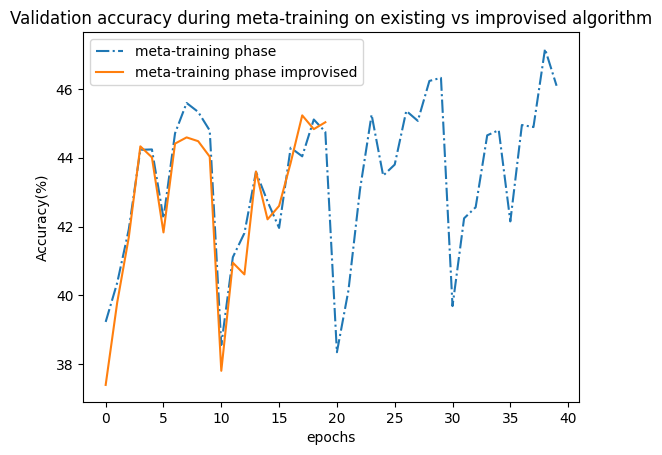

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

y1=[float(i.split(" ")[4]) for i in pd.read_csv('/content/drive/MyDrive/surya/AML_Assignment/Major_Project/MetaOptNet/experiments/FC100_MetaOptNet_SVM/train_log.txt')["{'num_epoch': 10"] if 'Validation' in i]
y2=[float(i.split(" ")[4]) for i in pd.read_csv('/content/drive/MyDrive/surya/AML_Assignment/Major_Project/MetaOptNet/experiments_improvised/FC100_MetaOptNet_SVM/train_log.txt')["{'num_epoch': 10"] if 'Validation' in i]

plt.plot(range(len(y1)), y1, '-.',label='meta-training phase')
plt.plot(range(len(y2)), y2, label='meta-training phase improvised')

plt.xlabel("epochs")
plt.ylabel("Accuracy(%)")
plt.title('Validation accuracy during meta-training on existing vs improvised algorithm')
plt.legend()
plt.show()

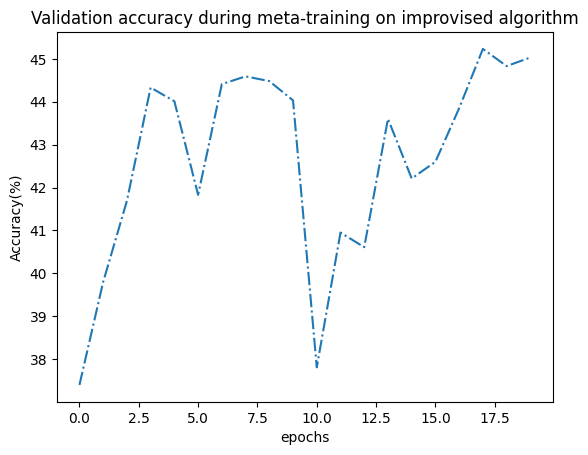

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

y1=[float(i.split(" ")[4]) for i in pd.read_csv('/content/drive/MyDrive/surya/AML_Assignment/Major_Project/MetaOptNet/experiments_improvised/FC100_MetaOptNet_SVM/train_log.txt')["{'num_epoch': 10"] if 'Validation' in i]

plt.plot(range(len(y1)), y1, '-.')

plt.xlabel("epochs")
plt.ylabel("Accuracy(%)")
plt.title('Validation accuracy during meta-training on improvised algorithm')
plt.show()

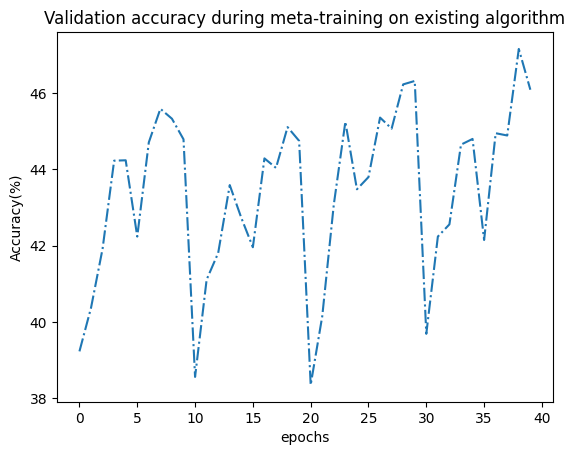

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

y1=[float(i.split(" ")[4]) for i in pd.read_csv('/content/drive/MyDrive/surya/AML_Assignment/Major_Project/MetaOptNet/experiments/FC100_MetaOptNet_SVM/train_log.txt')["{'num_epoch': 10"] if 'Validation' in i]

plt.plot(range(len(y1)), y1, '-.')

plt.xlabel("epochs")
plt.ylabel("Accuracy(%)")
plt.title('Validation accuracy during meta-training on existing algorithm')
plt.show()